In [1]:
! pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d atharvaingle/crop-recommendation-dataset

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  0% 0.00/63.7k [00:00<?, ?B/s]
100% 63.7k/63.7k [00:00<00:00, 42.4MB/s]


In [3]:
! unzip crop-recommendation-dataset.zip

Archive:  crop-recommendation-dataset.zip
  inflating: Crop_recommendation.csv  


In [4]:
# Importing libraries

from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [5]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px

In [6]:
df = pd.read_csv('Crop_recommendation.csv')
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [8]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [9]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [10]:
df.size

17600

In [11]:
df.shape

(2200, 8)

In [12]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [13]:
df['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

# Exploratory Data Analysis

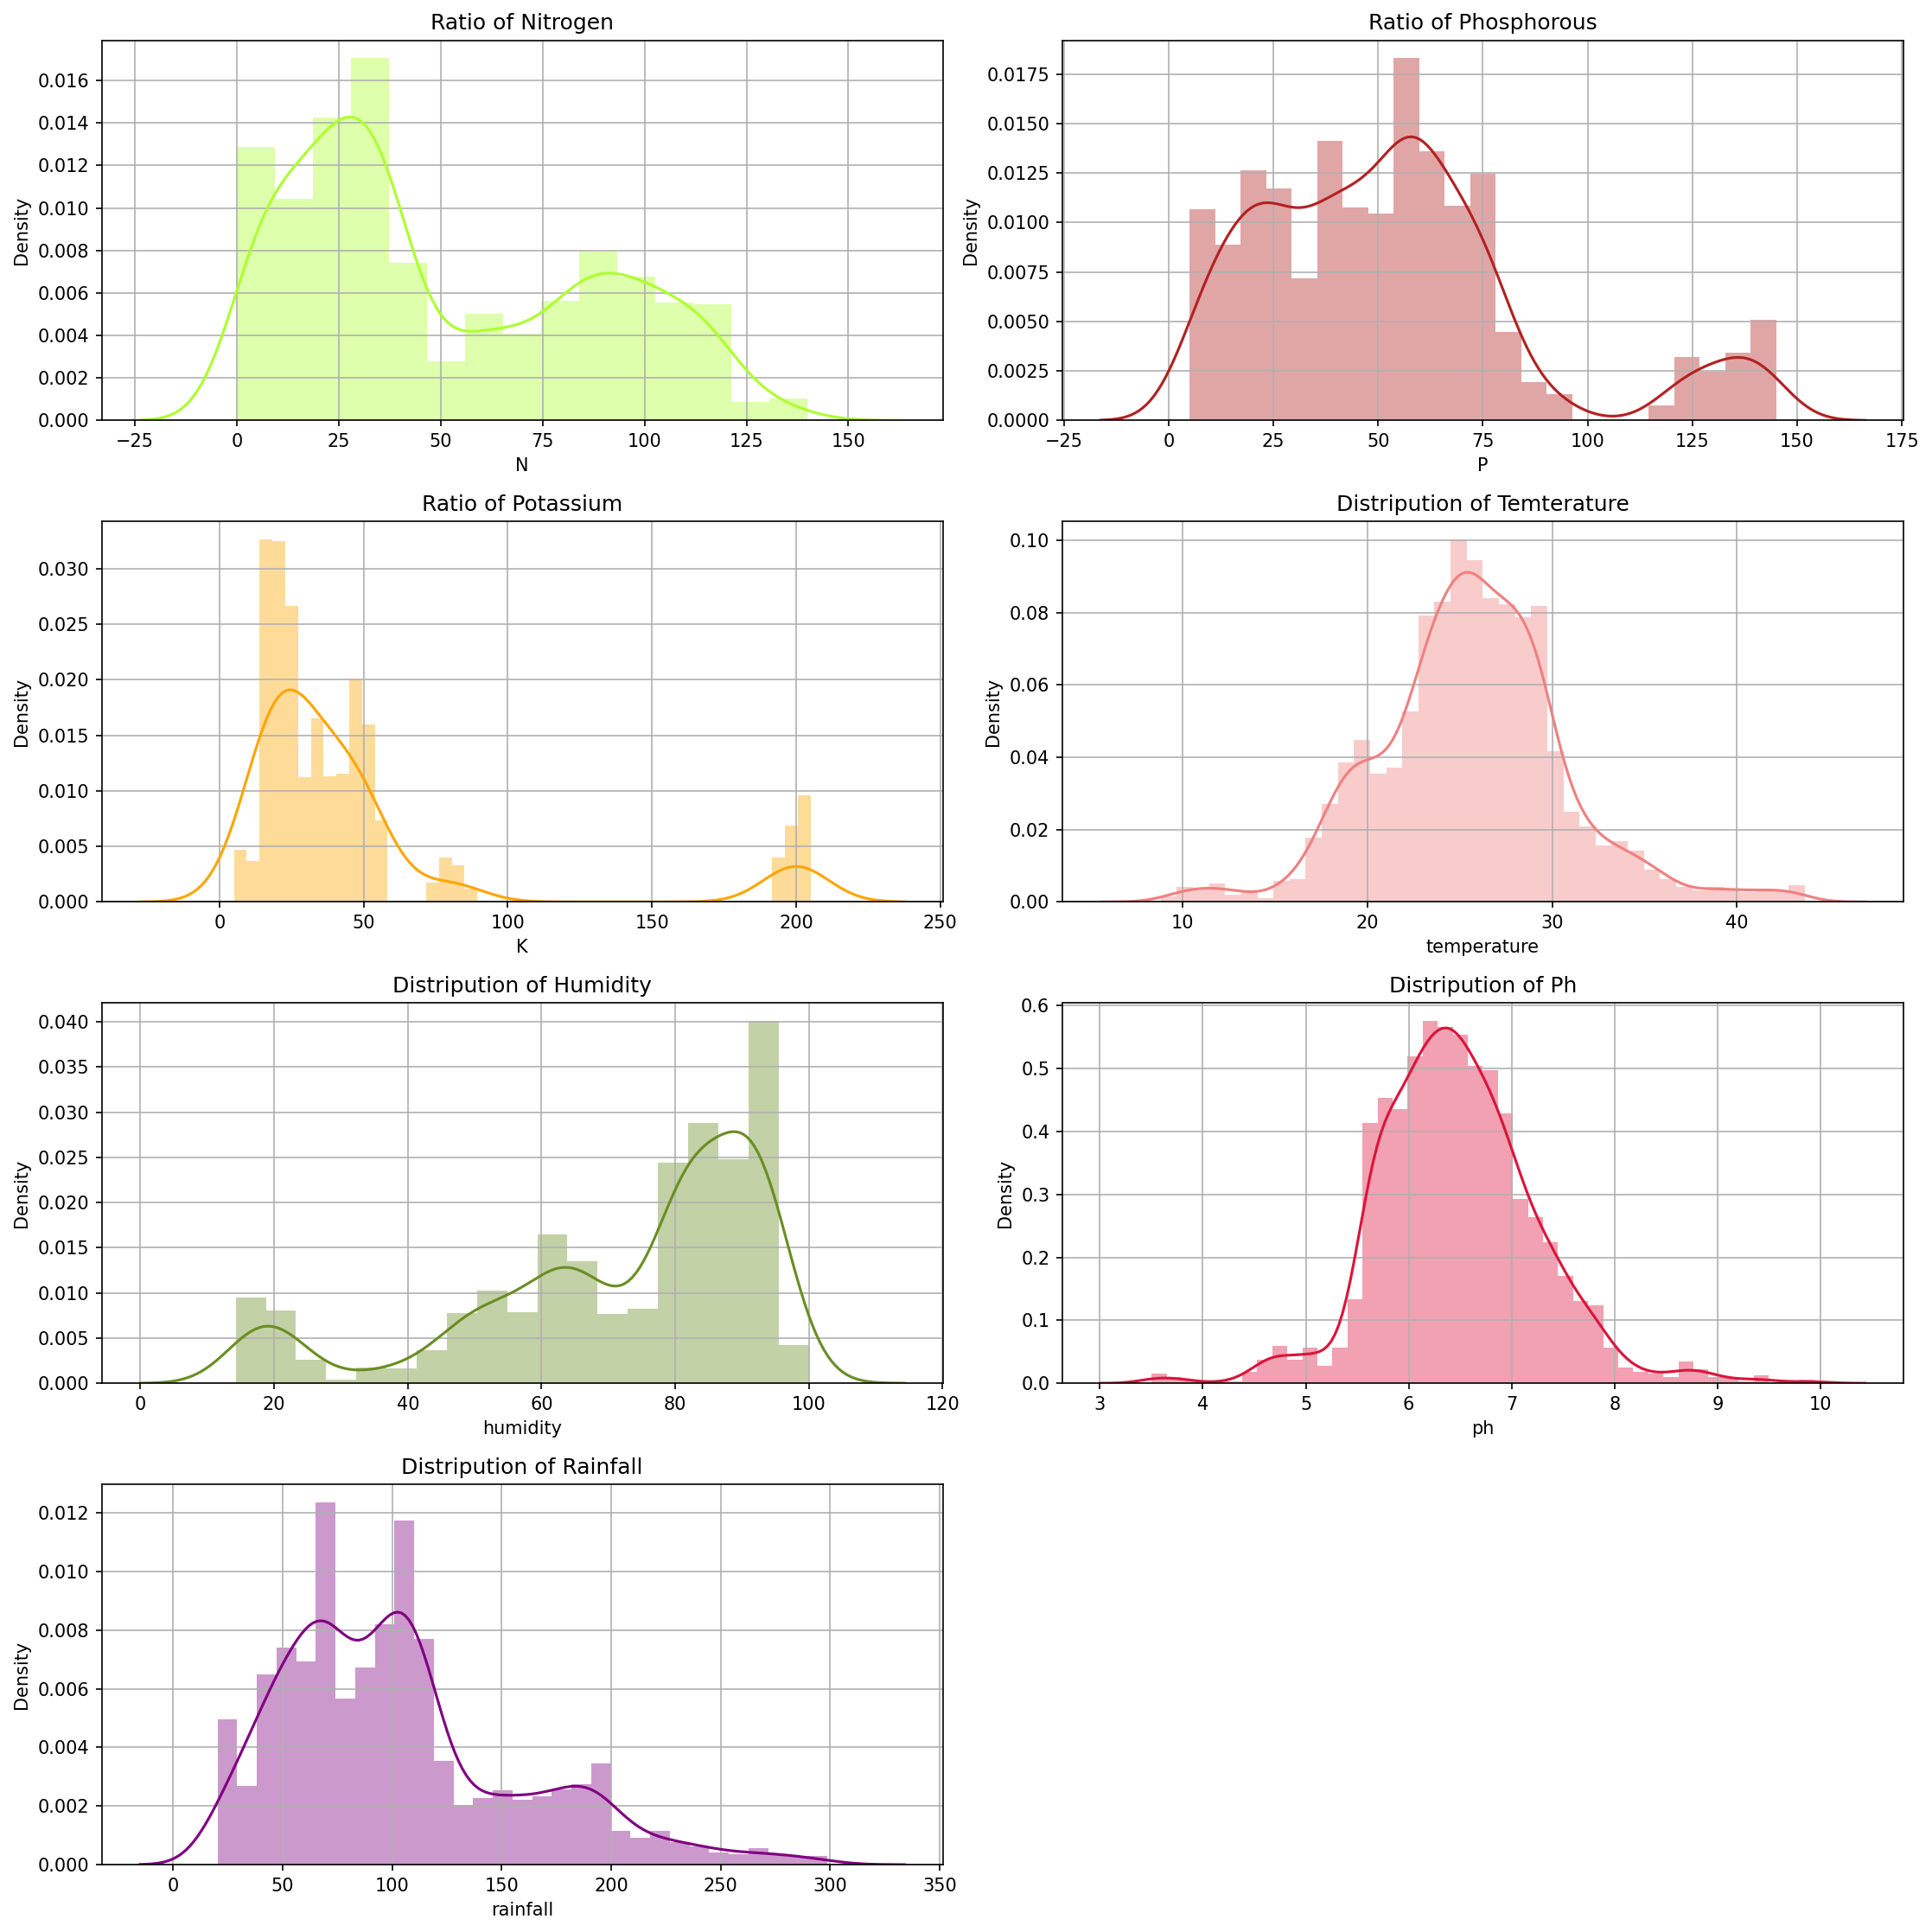

In [14]:
## over all distribution

plt.rcParams['figure.figsize'] = (15, 15)
plt.rcParams['figure.dpi'] = 150

# ratio of Nitrogen content in soil
plt.subplot(4, 2, 1)
sns.distplot(df['N'], color='greenyellow')
plt.title('Ratio of Nitrogen', fontsize = 12)
plt.tight_layout()
plt.grid()

# ratio of Phosphorous content in soil
plt.subplot(4, 2, 2)
sns.distplot(df['P'], color='firebrick')
plt.title('Ratio of Phosphorous', fontsize = 12)
plt.tight_layout()
plt.grid()

# ratio of Potassium content in soil
plt.subplot(4, 2, 3)
sns.distplot(df['K'], color = 'orange')
plt.title('Ratio of Potassium', fontsize = 12)
plt.tight_layout()
plt.grid()

# temperature in degree Celsius
plt.subplot(4, 2, 4)
sns.distplot(df['temperature'], color = 'lightcoral')
plt.title('Distripution of Temterature', fontsize = 12)
plt.tight_layout()
plt.grid()

# humidity - relative humidity in %
plt.subplot(4, 2, 5)
sns.distplot(df['humidity'], color = 'olivedrab')
plt.title('Distripution of Humidity', fontsize = 12)
plt.tight_layout()
plt.grid()

# ph - ph value of the soil
plt.subplot(4, 2, 6)
sns.distplot(df['ph'], color = 'crimson')
plt.title('Distripution of Ph', fontsize = 12)
plt.tight_layout()
plt.grid()

# rainfall - rainfall in mm
plt.subplot(4, 2, 7)
sns.distplot(df['rainfall'], color = 'purple')
plt.title('Distripution of Rainfall', fontsize = 12)
plt.tight_layout()
plt.grid()

In [15]:
def intractive_plot(df, feature, name):
    df_label = pd.pivot_table(df, index=['label'], aggfunc='mean')
    df_label_feature = df_label.sort_values(by=feature, ascending = False)
    
    fig = make_subplots(rows = 1, cols = 2)
    
    top = {
        
        'y': df_label_feature[feature][:10].sort_values().index,
        'x': df_label_feature[feature][:10].sort_values()
    }
    last = {
        
        'y': df_label_feature[feature][-10:].sort_values().index,
        'x': df_label_feature[feature][-10:].sort_values()
    }
    
    fig.add_trace(
        go.Bar(top,
               name='Least {} Needed'.format(name),
               marker_color = random.choice(colorarr),
               orientation = 'h',
               text = top['x']
              ),
        row = 1, col = 1
    )
    fig.add_trace(
        go.Bar(last,
               name='Least {} Needed'.format(name),
               marker_color = random.choice(colorarr),
               orientation = 'h',
               text = top['x']
              ),
        row = 1, col = 2
    )
    
    fig.update_traces(texttemplate = '%{text}', textposition = 'inside')
    fig.update_layout(title_text = name,
                      plot_bgcolor = 'white',
                      font_size = 12,
                      font_color = 'black',
                      height = 500
                     )


    fig.update_xaxes(showgrid = False)
    fig.update_yaxes(showgrid = False)
    fig.show()

In [16]:
colorarr = ['#0592D0','#Cd7f32', '#E97451', '#Bdb76b', '#954535', '#C2b280', '#808000','#C2b280', '#E4d008', '#9acd32', '#Eedc82', '#E4d96f',
           '#32cd32','#39ff14','#00ff7f', '#008080', '#36454f', '#F88379', '#Ff4500', '#Ffb347', '#A94064', '#E75480', '#Ffb6c1', '#E5e4e2',
           '#Faf0e6', '#8c92ac', '#Dbd7d2','#A7a6ba', '#B38b6d']

In [17]:
import random
## intractive chart based on 'POTASSIUM'

intractive_plot(df, feature = 'K', name = 'Potassium')

In [18]:
intractive_plot(df, feature = 'N', name = 'Nitrogen')

In [19]:
intractive_plot(df, feature = 'P', name = 'Phosphorus')

In [20]:
intractive_plot(df, feature = 'temperature', name = 'Temperature')

In [21]:
intractive_plot(df, feature = 'humidity', name = 'Humidity')

In [22]:
intractive_plot(df, feature = 'ph', name = 'PH')

In [23]:
intractive_plot(df, feature = 'rainfall', name = 'Rainfall')

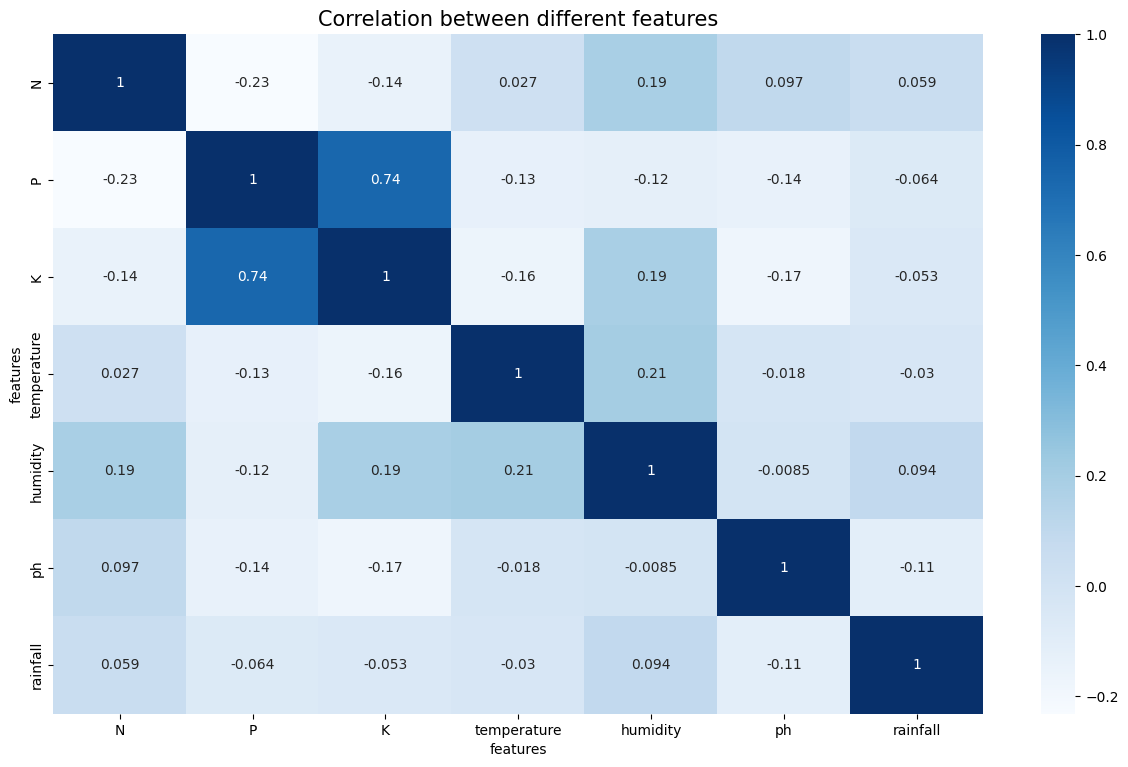

In [24]:
fig, ax = plt.subplots(1, 1, figsize=(15, 9), dpi=100)
sns.heatmap(df.corr(), annot = True, cmap = 'Blues')
ax.set(xlabel='features')
ax.set(ylabel='features')
plt.title('Correlation between different features', fontsize = 15, c='black')
# plt.tight_layout()
plt.show()

# Splitting in training and testing

In [25]:
features = df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = df['label']
labels = df['label']

In [26]:
# Initializing empty lists to append all model's name and corresponding name
acc = []
model = []

In [27]:
# Splitting into train and test data

from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)

In [28]:
print("Shape of X-TRAIN: {}".format(Xtrain.shape))
print("Shape of X-TEST: {}".format(Xtest.shape))
print("Shape of Y-TRAIN: {}".format(Ytrain.shape))
print("Shape of Y_TEST: {}".format(Ytest.shape))

Shape of X-TRAIN: (1760, 7)
Shape of X-TEST: (440, 7)
Shape of Y-TRAIN: (1760,)
Shape of Y_TEST: (440,)


# Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=2)

LogReg.fit(Xtrain,Ytrain)

predicted_values = LogReg.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Logistic Regression's Accuracy is:  0.9522727272727273
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.86      0.75      0.80        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       0.86      0.90      0.88        20
      grapes       1.00      1.00      1.00        18
        jute       0.84      0.93      0.88        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       0.88      1.00      0.94        23
       maize       0.90      0.86      0.88        21
       mango       0.96      1.00      0.98        26
   mothbeans       0.84      0.84      0.84        19
    mungbean       1.00      0.96      0.98        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00   

In [30]:
from sklearn.model_selection import cross_val_score

# Cross validation score (Logistic Regression)
score = cross_val_score(LogReg,features,target,cv=5)
score

array([0.95      , 0.96590909, 0.94772727, 0.96818182, 0.94318182])

### Saving Logistic Regression model

In [31]:
import pickle

# Dump the trained Naive Bayes classifier with Pickle
LR_pkl_filename = 'LogisticRegression.pkl'

# Open the file to save as pkl file
LR_Model_pkl = open(LR_pkl_filename, 'wb')
pickle.dump(LogReg, LR_Model_pkl)

# Close the pickle instances
LR_Model_pkl.close()

# Gaussian Naive Bayes

In [32]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(Xtrain,Ytrain)

predicted_values = NaiveBayes.predict(Xtest)
test = np.array(Xtest.iloc[1,:])
test = test.reshape(1,-1)
print(NaiveBayes.predict(test))
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

['pomegranate']
Naive Bayes's Accuracy is:  0.990909090909091
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.88      1.00      0.93        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      1.00      1.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       

In [33]:
# Cross validation score (NaiveBayes)
score = cross_val_score(NaiveBayes,features,target,cv=5)
score

array([0.99772727, 0.99545455, 0.99545455, 0.99545455, 0.99090909])

### Saving Gaussian Naive Bayes Model

In [34]:
# Dump the trained Naive Bayes classifier with Pickle
NB_pkl_filename = 'NBClassifier.pkl'

# Open the file to save as pkl file
NB_Model_pkl = open(NB_pkl_filename, 'wb')
pickle.dump(NaiveBayes, NB_Model_pkl)

# Close the pickle instances
NB_Model_pkl.close()

# Support Vector Machine (SVM)

In [35]:
from sklearn.svm import SVC

SVM = SVC(gamma='auto')

SVM.fit(Xtrain,Ytrain)

predicted_values = SVM.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('SVM')
print("SVM's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

SVM's Accuracy is:  0.10681818181818181
              precision    recall  f1-score   support

       apple       1.00      0.23      0.38        13
      banana       1.00      0.24      0.38        17
   blackgram       1.00      0.19      0.32        16
    chickpea       1.00      0.05      0.09        21
     coconut       1.00      0.05      0.09        21
      coffee       0.00      0.00      0.00        22
      cotton       1.00      0.05      0.10        20
      grapes       1.00      0.06      0.11        18
        jute       1.00      0.07      0.13        28
 kidneybeans       0.03      1.00      0.07        14
      lentil       0.00      0.00      0.00        23
       maize       0.00      0.00      0.00        21
       mango       0.00      0.00      0.00        26
   mothbeans       0.00      0.00      0.00        19
    mungbean       1.00      0.12      0.22        24
   muskmelon       1.00      0.30      0.47        23
      orange       1.00      0.03      0.

In [36]:
# Cross validation score (SVM)
score = cross_val_score(SVM,features,target,cv=5)
score

array([0.27727273, 0.28863636, 0.29090909, 0.275     , 0.26818182])

### Saving SVM model

In [37]:
# Dump the trained SVM classifier with Pickle
SVM_pkl_filename = 'SVMClassifier.pkl'

# Open the file to save as pkl file
SVM_Model_pkl = open(SVM_pkl_filename, 'wb')
pickle.dump(SVM, SVM_Model_pkl)

# Close the pickle instances
SVM_Model_pkl.close()

# Decision Tree

In [38]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(Xtrain,Ytrain)

predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)
array = [[90,12,3,4,5,6,2]]
test = np.array(Xtest.iloc[1,:])
test = test.reshape(1,-1)

print(DecisionTree.predict(test))
print(classification_report(Ytest,predicted_values))

DecisionTrees's Accuracy is:  90.0
['pomegranate']
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.59      1.00      0.74        16
    chickpea       1.00      1.00      1.00        21
     coconut       0.91      1.00      0.95        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.74      0.93      0.83        28
 kidneybeans       0.00      0.00      0.00        14
      lentil       0.68      1.00      0.81        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       0.00      0.00      0.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1

In [39]:
# Cross validation score (Decision Tree)
score = cross_val_score(DecisionTree, features, target,cv=5)
score

array([0.93636364, 0.90909091, 0.91818182, 0.87045455, 0.93636364])

### Saving Decision Tree model

In [40]:
# Dump the trained Naive Bayes classifier with Pickle
DT_pkl_filename = 'DecisionTree.pkl'

# Open the file to save as pkl file
DT_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(DecisionTree, DT_Model_pkl)

# Close the pickle instances
DT_Model_pkl.close()

# Random Forest

In [41]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(Xtrain,Ytrain)

predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

RF's Accuracy is:  0.990909090909091
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.94      1.00      0.97        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.90      1.00      0.95        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.95      0.97        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00 

In [42]:
# Cross validation score (Random Forest)
score = cross_val_score(RF,features,target,cv=5)
score

array([0.99772727, 0.99545455, 0.99772727, 0.99318182, 0.98863636])

### Saving Random Forest model

In [43]:
# Dump the trained Naive Bayes classifier with Pickle
RF_pkl_filename = 'RandomForest.pkl'

# Open the file to save as pkl file
RF_Model_pkl = open(RF_pkl_filename, 'wb')
pickle.dump(RF, RF_Model_pkl)

# Close the pickle instances
RF_Model_pkl.close()

# XGBoost

In [44]:
import xgboost as xgb
XB = xgb.XGBClassifier()
XB.fit(Xtrain,Ytrain)

predicted_values = XB.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('XGBoost')
print("XGBoost's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

XGBoost's Accuracy is:  0.9931818181818182
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.96      0.93      0.95        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      1.00      1.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00     

In [45]:
# Cross validation score (XGBoost)
score = cross_val_score(XB,features,target,cv=5)
score

array([0.98636364, 0.99318182, 0.99545455, 0.99090909, 0.98409091])

### Saving XGBoost model

In [46]:
# Dump the trained Naive Bayes classifier with Pickle
XB_pkl_filename = 'XGBoost.pkl'

# Open the file to save as pkl file
XB_Model_pkl = open(XB_pkl_filename, 'wb')
pickle.dump(XB, XB_Model_pkl)

# Close the pickle instances
XB_Model_pkl.close()

# ADA Boost

In [47]:
from sklearn.ensemble import AdaBoostClassifier

ADA = AdaBoostClassifier(n_estimators=20, random_state=0)
ADA.fit(Xtrain, Ytrain)

predicted_values = ADA.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('ADABoost')
print("ADABoost's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

ADABoost's Accuracy is:  0.19545454545454546
              precision    recall  f1-score   support

       apple       0.42      1.00      0.59        13
      banana       0.00      0.00      0.00        17
   blackgram       0.00      0.00      0.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       0.00      0.00      0.00        21
      coffee       0.00      0.00      0.00        22
      cotton       0.00      0.00      0.00        20
      grapes       0.00      0.00      0.00        18
        jute       0.00      0.00      0.00        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       0.00      0.00      0.00        23
       maize       0.00      0.00      0.00        21
       mango       0.00      0.00      0.00        26
   mothbeans       0.00      0.00      0.00        19
    mungbean       0.00      0.00      0.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       0.00      0.00   

In [48]:
# Cross validation score (XGBoost)
score = cross_val_score(ADA,features,target,cv=5)
score

array([0.22727273, 0.22727273, 0.22727273, 0.22727273, 0.22727273])

### Saving ADA Boost model

In [49]:
# Dump the trained Naive Bayes classifier with Pickle
ADA_pkl_filename = 'ADABoost.pkl'

# Open the file to save as pkl file
ADA_Model_pkl = open(ADA_pkl_filename, 'wb')
pickle.dump(ADA, ADA_Model_pkl)

# Close the pickle instances
ADA_Model_pkl.close()

# K-Nearest Neightbours (KNN)

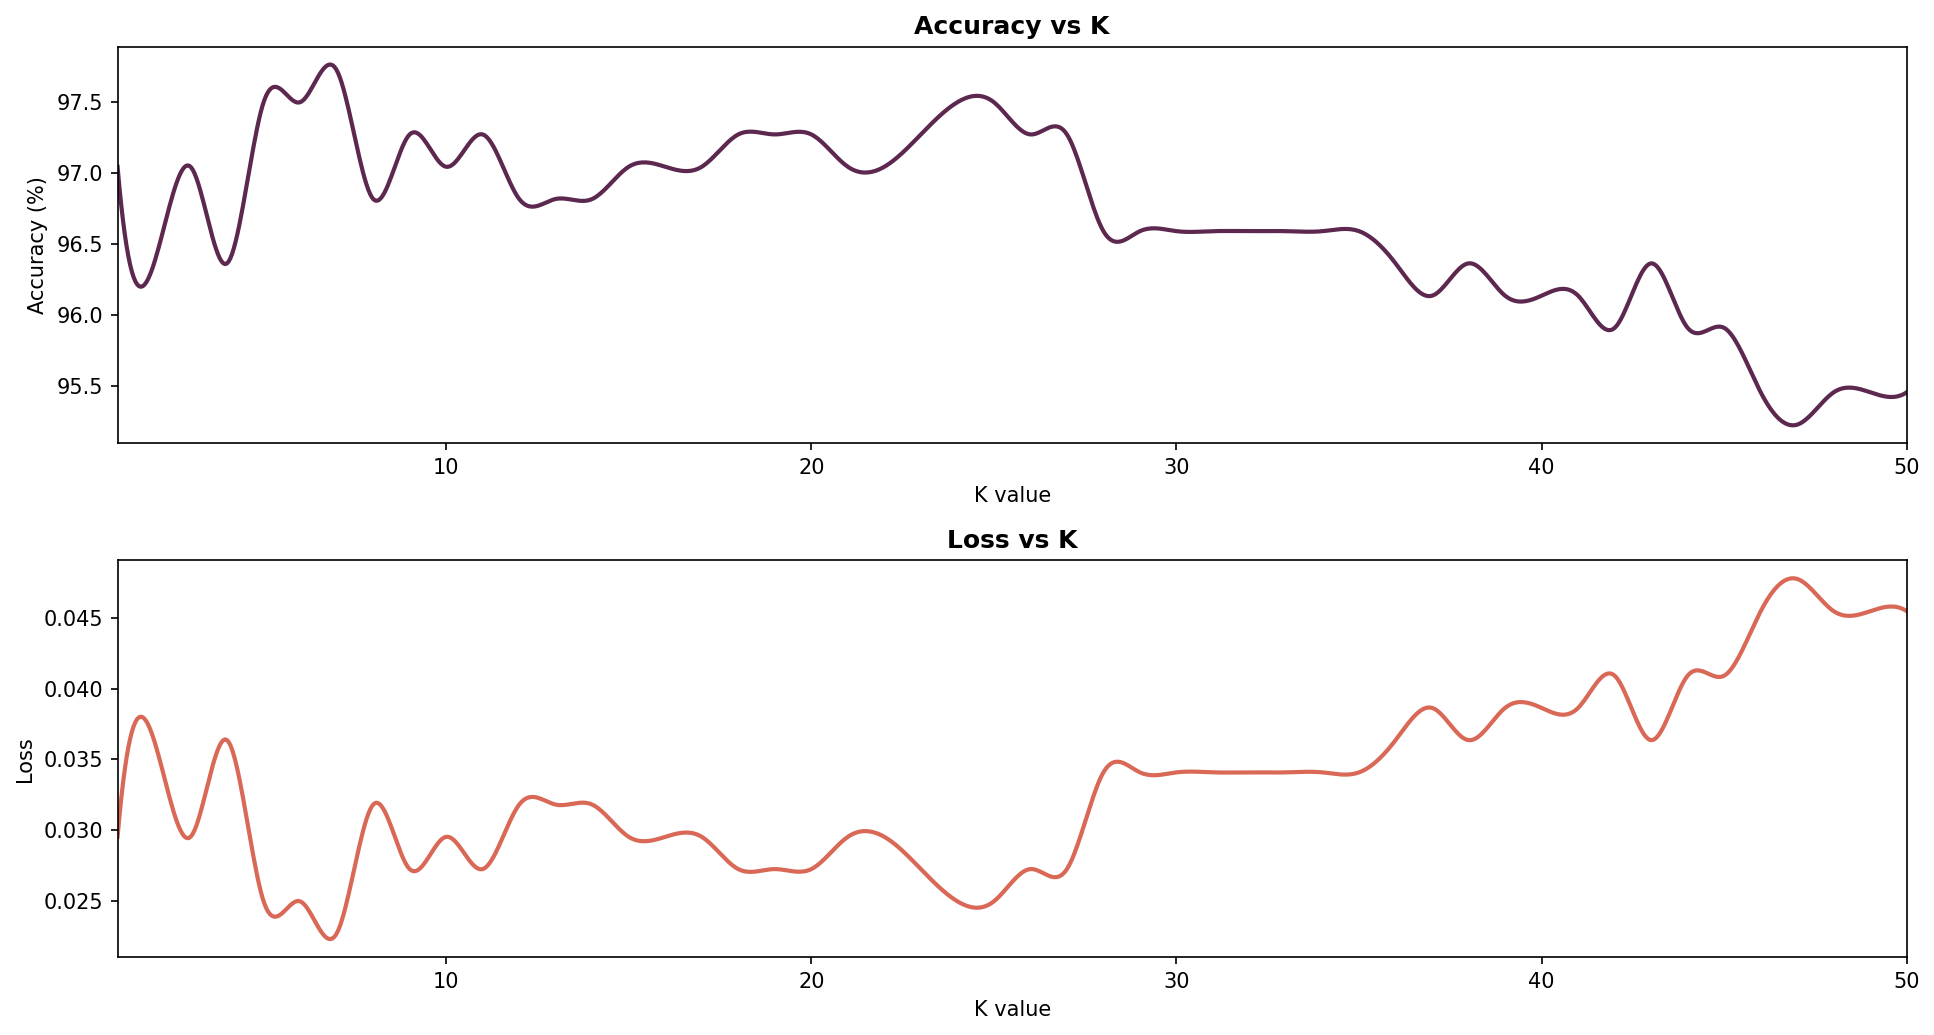


Optimal value of K =  6


In [50]:
# Calculating optimal K value

from scipy.interpolate import make_interp_spline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

acc_list = []
err_rate = []

neighbors = np.linspace(1, 50, 50)
neighbors = neighbors.astype(int)

for K in neighbors:
  classifier = KNeighborsClassifier(n_neighbors = K)
  classifier.fit(Xtrain, Ytrain)
  y_pred = classifier.predict(Xtest)

  accuracy = round(accuracy_score(Ytest, y_pred)*100, 3)

  acc_list.append(accuracy)
  err_rate.append(np.mean(y_pred != Ytest))

xy = make_interp_spline(neighbors, acc_list)
xz = make_interp_spline(neighbors, err_rate)
x = np.linspace(1, 50, 1000)
y = xy(x)
z = xz(x)

plt.figure(figsize = (13, 7))
plt.subplot(2, 1, 1)
sns.lineplot(x, y, linewidth = 2, color = '#5C284F')
plt.xlabel('K value')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy vs K', fontweight = 'bold')
plt.xlim(min(neighbors), max(neighbors))

plt.subplot(2, 1, 2)
sns.lineplot(x, z, linewidth = 2, color = '#D96856')
plt.xlabel('K value')
plt.ylabel('Loss')
plt.title('Loss vs K', fontweight = 'bold')
plt.xlim(min(neighbors), max(neighbors))

plt.tight_layout()
plt.show()

K_opt = acc_list.index(max(acc_list))
print('\nOptimal value of K = ', K_opt)

In [51]:
KNN = KNeighborsClassifier(n_neighbors=K_opt+1)
KNN.fit(Xtrain, Ytrain)
predicted_values = KNN.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('KNN')
print("KNN's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

KNN's Accuracy is:  0.9772727272727273
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.94      1.00      0.97        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       0.95      1.00      0.98        20
      grapes       1.00      1.00      1.00        18
        jute       0.89      0.89      0.89        28
 kidneybeans       0.93      1.00      0.97        14
      lentil       0.96      1.00      0.98        23
       maize       1.00      0.95      0.98        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.89      0.94        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.0

In [52]:
# Cross validation score (XGBoost)
score = cross_val_score(KNN,features,target,cv=5)
score

array([0.96818182, 0.98409091, 0.98409091, 0.975     , 0.97954545])

### Saving KNN Model

In [53]:
# Dump the trained Naive Bayes classifier with Pickle
KNN_pkl_filename = 'KNNBoost.pkl'

# Open the file to save as pkl file
KNN_Model_pkl = open(KNN_pkl_filename, 'wb')
pickle.dump(KNN, KNN_Model_pkl)

# Close the pickle instances
KNN_Model_pkl.close()

# **Accuracy Comparison**

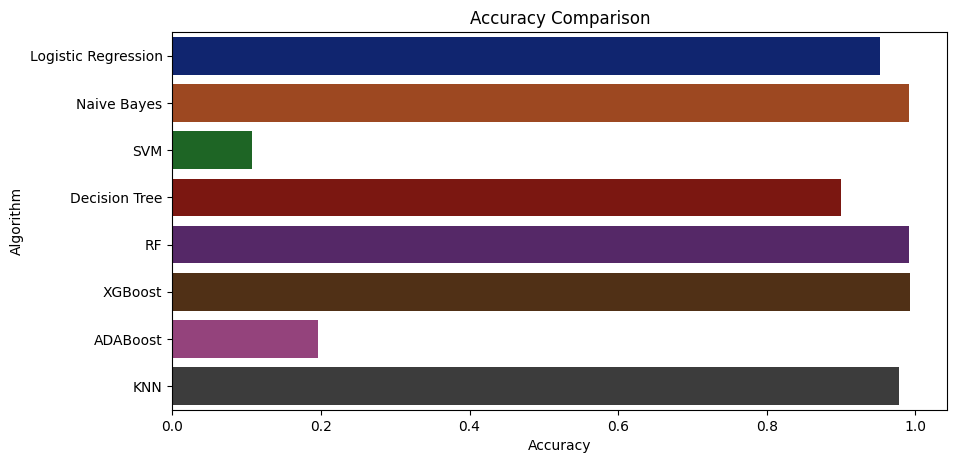

In [54]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')

In [55]:
accuracy_models = dict(zip(model, acc))
for k, v in accuracy_models.items():
    print (k, '-->', v)

Logistic Regression --> 0.9522727272727273
Naive Bayes --> 0.990909090909091
SVM --> 0.10681818181818181
Decision Tree --> 0.9
RF --> 0.990909090909091
XGBoost --> 0.9931818181818182
ADABoost --> 0.19545454545454546
KNN --> 0.9772727272727273


In [68]:
data = np.array([[104,18, 30, 23.603016, 60.3, 6.7, 140.91]])
pred_LR = LogReg.predict(data)
pred_NB = NaiveBayes.predict(data)
pred_SVM = SVM.predict(data)
pred_DT = DecisionTree.predict(data)
pred_RF = RF.predict(data)
pred_ADA = ADA.predict(data)
pred_KNN = KNN.predict(data)

print("Prediction of Logistic Regression: {}".format(pred_LR))
print("Prediction of Naive Bayes: {}".format(pred_NB))
print("Prediction of SVM: {}".format(pred_SVM))
print("Prediction of Decision Tree: {}".format(pred_DT))
print("Prediction of Random Forest: {}".format(pred_RF))
print("Prediction of ADA Boost: {}".format(pred_ADA))
print("Prediction of KNN: {}".format(pred_KNN))

Prediction of Logistic Regression: ['coffee']
Prediction of Naive Bayes: ['coffee']
Prediction of SVM: ['coffee']
Prediction of Decision Tree: ['coffee']
Prediction of Random Forest: ['coffee']
Prediction of ADA Boost: ['watermelon']
Prediction of KNN: ['coffee']


In [69]:
data = np.array([[83, 45, 60, 28, 70.3, 7.0, 150.9]])
pred_LR = LogReg.predict(data)
pred_NB = NaiveBayes.predict(data)
pred_SVM = SVM.predict(data)
pred_DT = DecisionTree.predict(data)
pred_RF = RF.predict(data)
pred_ADA = ADA.predict(data)
pred_KNN = KNN.predict(data)

print("Prediction of Logistic Regression: {}".format(pred_LR))
print("Prediction of Naive Bayes: {}".format(pred_NB))
print("Prediction of SVM: {}".format(pred_SVM))
print("Prediction of Decision Tree: {}".format(pred_DT))
print("Prediction of Random Forest: {}".format(pred_RF))
print("Prediction of ADA Boost: {}".format(pred_ADA))
print("Prediction of KNN: {}".format(pred_KNN))

Prediction of Logistic Regression: ['jute']
Prediction of Naive Bayes: ['jute']
Prediction of SVM: ['kidneybeans']
Prediction of Decision Tree: ['jute']
Prediction of Random Forest: ['jute']
Prediction of ADA Boost: ['watermelon']
Prediction of KNN: ['jute']
